# Logistic Regression Project

Here I will explain a logistic regression modeling for binary outcome variables here. That means the outcome variable can have only two values, 0 or 1.
We will also analyze:
1. the correlation amongst the predictor variables (the input variables that will be used to predict the outcome variable),
2. how to extract useful information from the model results,
3. the visualization techniques to better present and understand the data and
4. the prediction of the outcome. I am assuming that you have the basic knowledge of statistics and python.


# Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

# Reading the csv file

In [2]:
# Loading and Extracting the independent and dependent data set

df=pd.read_csv('heart_disease.csv', index_col=[0])

In [3]:
# Printing the first 5 rows

df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
# printing the number of data sets 

print("No of patient"+ " "+str(len(df.index)))

No of patient 303


# Exploring the data set to derive useful information

In [5]:
df.shape

(303, 14)

In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [7]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [8]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB
None


# Data preprocessing

In [10]:
# Filling na values with zero

df.fillna(0, inplace=True)

In [11]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [12]:
# Replacing the string values

df["AHD"] = df.AHD.replace({"Yes":1, "No":0})
df["ChestPain"]=df.ChestPain.replace({"typical":1, "nontypical":2, "nonanginal":3, "asymptomatic":4})
df["Thal"]=df.Thal.replace({"normal":3, "fixed":6, "reversable":7})
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7,1
300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7,1
301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7,1
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    int64  
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    float64
 12  Thal       303 non-null    int64  
 13  AHD        303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 35.5 KB


In [14]:
# Proportion of males and females having heart disease in the dataset

df["Sex1"] = df.Sex.replace({1: "Male", 0:"Female"})
c = pd.crosstab(df.Sex1, df.AHD)
c = c.apply(lambda x: x/x.sum(), axis=1)
c

AHD,0,1
Sex1,,
Female,0.742268,0.257732
Male,0.446602,0.553398


In [15]:
# Odds and log odds

c["odds"] = c.iloc[:, 1] / c.iloc[:, 0]

In [16]:
c.odds.Male / c.odds.Female

# The ratio comes out to be 3.568 which indicates a man has a 3.568 times greater chance of having a heart disease

3.5686956521739135

In [17]:
c['logodds'] = np.log(c.odds)
c

AHD,0,1,odds,logodds
Sex1,,,,
Female,0.742268,0.257732,0.347222,-1.05779
Male,0.446602,0.553398,1.239130,0.21441


In [18]:
# Model summary using the age variable 

model = sm.GLM.from_formula("AHD ~ Age", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  303
Model:                            GLM   Df Residuals:                      301
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -201.27
Date:                Tue, 24 Aug 2021   Deviance:                       402.54
Time:                        16:43:15   Pearson chi2:                     303.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0059      0.759     -3.960      0.000      -4.494      -1.518
Age            0.0520      0.014      3.803      0.000       0.025       0.079
==============================================================================
"""

In [19]:
# Model summary using the gender variable 

model = sm.GLM.from_formula("AHD ~ Sex1", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  303
Model:                            GLM   Df Residuals:                      301
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -196.97
Date:                Tue, 24 Aug 2021   Deviance:                       393.93
Time:                        16:43:15   Pearson chi2:                     303.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0578      0.232     -4.557      0.000      -1.513      -0.603
Sex1[T.Male]     1.2722      0.271      4.692      0.000       0.741       1.804
================================================================================
"""

# logistic regression Model With Three Covariates

In [20]:
# Generate a model using both the ‘Age’ and ‘Sex1’ variable

model = sm.GLM.from_formula("AHD ~ Age + Sex1", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  303
Model:                            GLM   Df Residuals:                      300
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -186.15
Date:                Tue, 24 Aug 2021   Deviance:                       372.31
Time:                        16:43:17   Pearson chi2:                     298.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.8077      0.898     -5.353      0.000      -6.568      -3.047
Sex1[T.Male]     1.4989      0.289      5.179      0.000       0.932       2.066
Age              0.0657      0.015      4.427      0.000       0.037       0.095
================================================================================
"""

In [21]:
# This time we will add ‘Chol’ or cholesterol variables with ‘Age’ and ‘Sex1’

model = sm.GLM.from_formula("AHD ~ Age + Sex1 + Chol", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  303
Model:                            GLM   Df Residuals:                      299
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -184.30
Date:                Tue, 24 Aug 2021   Deviance:                       368.59
Time:                        16:43:17   Pearson chi2:                     295.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.9094      1.095     -5.395      0.000      -8.056      -3.762
Sex1[T.Male]     1.6318      0.303      5.382      0.000       1.038       2.226
Age              0.0622      0.015      4.117      0.000       0.033       0.092
Chol             0.0048      0.003      1.902      0.057      -0.000       0.010
================================================================================
"""

In [22]:
df[['Age', 'Sex', 'Chol']].corr()

,Age,Sex,Chol
Age,1.000000,-0.097542,0.208950
Sex,-0.097542,1.000000,-0.199915
Chol,0.208950,-0.199915,1.000000


# Visualization of the Fitted Model

<AxesSubplot:>

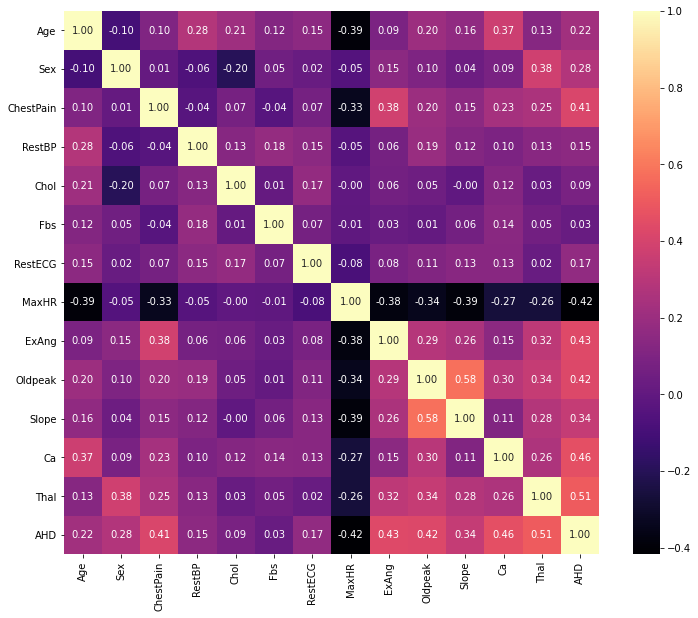

In [23]:
# Data Visualization correlation matrix

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [24]:
# Countplot of Heart disease in Male v/s Female

df2 = df.copy()

def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['Sex'] = df2['Sex'].apply(chng)

def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['AHD'] = df2['AHD'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s target\n')

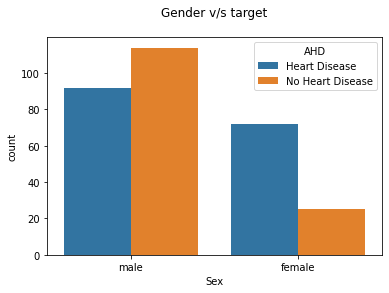

In [25]:
sns.countplot(data= df2, x='Sex',hue='AHD')
plt.title('Gender v/s target\n')

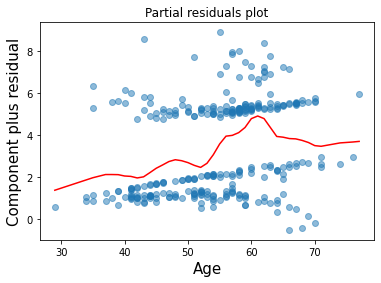

In [26]:
from statsmodels.graphics.regressionplots import add_lowess
fig = result.plot_partial_residuals("Age")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.5)
_ = add_lowess(ax)

# This plot shows that the heart disease rate rises rapidly from the age of 53 to 60.

# Logistic Regression

In [27]:
import numpy as np

class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

# Logistic Regression Testing

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def accuracy(y_true, y_pred):
    accuracy=np.sum(y_true==y_pred)/len(y_true)
    return accuracy

X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) # 20% of data for testing

regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# Result

In [29]:
# First 10 predictions

print(predictions[0:10])

[0 0 1 1 1 0 0 0 1 1]


In [30]:
# First 10 tests

print(y_test[0:10])

126    0
58     1
283    1
67     1
115    1
282    0
133    0
256    0
38     1
274    0
Name: AHD, dtype: int64


In [31]:
# Model Accuracy

print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.7213114754098361


In [32]:
# Confusion Matrix

cm=confusion_matrix(y_test, predictions)
print(cm)

[[14 15]
 [ 2 30]]


<AxesSubplot:>

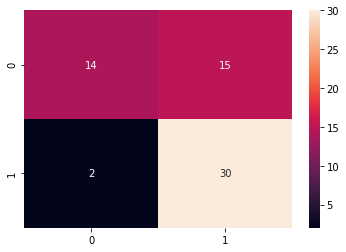

In [33]:
# Confusion Matrix Visualisation

sns.heatmap(confusion_matrix(y_test, predictions),annot=True)